# Classification: images. The MNIST example

In this example we will use the (now) classic MNIST dataset. The task is very simple. Given images of manually drawn images, learn a classifier that is able to decide which is the digit drawn. This is a classification problem with 10 classes (0, 1, 2, 3, ..., 9).

I will use examples from several sources. Mostly notebooks from kaggle contributors.
https://www.kaggle.com/hamzaboulahia/logistic-regression-mnist-classification

In [1]:
#import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#advanced statistical graphs
import seaborn as sb 
%matplotlib inline 
# With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

from scipy.io import loadmat
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

## Loading the data

This dataset contains images with dimensions 28 x 28. Images can be stored in many different formats like CSV, jpeg, etc. In this dataset images are stored as `mat`. This is matlab's format. Matlab is a famous software for mathematics, statistics and ML. It is very powerful but proprietary having a payed license. Matlab has its own programming language. 

We load the data with the `loadmat`function provided by the **module** `io` from the **package** `scipy`. In Portuguese: módulo and pacote. We can also use the more generic term `library` (biblioteca).

This loading operation stores the data in memory as a matrix with 28x28=784 columns and as many lines as images. Each line is an image and contains values between 0 and 255 indicating a level of gray (or any other scale you may enjoy). This is a **convenient representation** since now we have the data in the tabular format that all the methods we have seen so far use.

In other words, we have **transformed images** into a numeric table that can be stored as a matrix or a data frame. The attributes are the pixels. The first one is the top-left pixel, followed by all the pixels on the top of the image, followed by the next line of the image, until the bottom right pixel.

This way, we can **transform images into a regular data set** and apply any method. Well, results may not be the best. But that is another issue.

The `T` function transposes the matrix data.

In [2]:
# Loading MNIST data

mnist = loadmat("../Dados/mnist-original.mat")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]
mnist_data.shape

(70000, 784)

## Looking at the data

We can see that we have 70k images. We will now look at the numbers in the data.

In [3]:
mnist_data, mnist_label

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([0., 0., 0., ..., 9., 9., 9.]))

In [4]:
# the first image
mnist_data[0,:]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

## Seeing the data

In fact we can visualize each line as an image. We can do that with fancy plotting, but first we will do it with plain python (this works in very old screens). Try out with different lines and discover each of which class.

In [6]:
case = 0
x = mnist_data[case,:]
print(mnist_label[case])
for line in range(28):
    for col in range(28):
        if(x[line*28+col]>10):
            print('x', end='')
        else:
            print('.', end='')
    print()

0.0
............................
............................
............................
............................
...............xxxxx........
..............xxxxxx........
.............xxxxxxxx.......
............xxxxxxxxxx......
...........xxxxxxxxxxx......
..........xxxxxxxxxxxx......
.........xxxxxxxxx..xxx.....
........xxxxxx......xxx.....
........xxxxxx......xxx.....
.......xxxx.........xxx.....
.......xxx..........xxx.....
......xxxx..........xxx.....
......xxxx.........xxxx.....
......xxx.........xxxx......
......xxx.......xxxx........
......xxx......xxxx.........
......xxxxxxxxxxxxx.........
......xxxxxxxxxxx...........
......xxxxxxxxx.............
.......xxxxxxx..............
............................
............................
............................
............................


## True plotting

We can see the images in any scale of color.

In [9]:
def mnist_random_example():
    idx = np.random.randint(70000)
    exp = mnist_data[idx].reshape(28,28)
    print("The number in the image below is:", mnist_label[idx])
    plt.imshow(exp)

The number in the image below is: 0.0


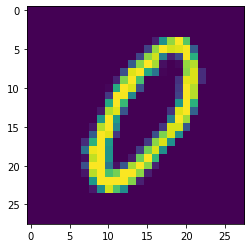

In [10]:
mnist_random_example()

In [46]:
# Splitting the data into Train and Test datasets

X_train, X_test, Y_train, Y_test = train_test_split(mnist_data, mnist_label, train_size=0.05, test_size=0.05, random_state=42)
print("The shape of the training set feature matrix is:", X_train.shape)
print("The shape of the training label vector is:", Y_train.shape)
print("The shape of the test set feature matrix is:", X_test.shape)
print("The shape of the test label vector is:", Y_test.shape)

The shape of the training set feature matrix is: (3500, 784)
The shape of the training label vector is: (3500,)
The shape of the test set feature matrix is: (3500, 784)
The shape of the test label vector is: (3500,)


In [47]:
from sklearn.svm import SVC
model = SVC(kernel='poly', C=2)
model.fit(X_train, Y_train)

SVC(C=2, kernel='poly')

In [48]:
model.score(X_test, Y_test)

0.9242857142857143

## Classifiers

Although this is an image classification problem, it is set an a way that makes it relatively easy. Never the less we see that different classifiers may have more or less difficulty in dealing with this problem.

### Decision trees

1. Try the decision tree algorithm with a low `max_depth`. This is not the kind of data for decision trees. However, it is a very efficient algorithm that obtains results well above random. 
2. Use other parameters like complexity (`ccp_alpha`). The highest the complexity the more it takes the size of the tree into account. A large complexity will force the tree to be minimal (it is like using a very small max_depth). https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning
2. Look at the confusion matrix. Which classes are mistaken in decision trees and in SVM?
4. Does decision tree improve with the number of training examples? What about SVM?

In [49]:
from sklearn import tree

model = tree.DecisionTreeClassifier(ccp_alpha=0)
model.fit(X_train,Y_train)
model.score(X_test, Y_test)

0.732

In [50]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[256,   1,   9,   7,   4,  12,  14,   6,   3,   8],
       [  1, 350,   7,   7,   1,   3,   2,   5,   9,   2],
       [  7,   9, 236,  21,   8,  10,  14,  20,  22,   5],
       [  9,   6,   4, 259,   9,  32,   4,   8,  12,  13],
       [  2,   4,   6,   4, 252,   6,  10,   5,  18,  22],
       [ 14,   8,   7,  41,   9, 200,  20,  12,  14,  17],
       [ 10,   6,  16,   5,   7,  18, 291,   2,  18,   4],
       [  3,   2,  12,   9,  13,   1,   1, 295,   8,  16],
       [  9,   4,  25,  14,  14,  18,  21,   2, 210,  20],
       [  2,   4,   6,  13,  39,   7,  11,  23,  22, 213]])

### Other classifiers

Logistic Regression does a good job here as well.

In [51]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0).fit(X_train, Y_train)
model.score(X_test, Y_test)


/opt/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8454285714285714

In [54]:
Y_pred = model.predict(X_test)
confusion_matrix(Y_test, Y_pred)

182.0

### Multi layer perceptron

This data is low level. Therefore it would benefit from using hidden layers that abstract the input atrributes. Given that we have 728 low level input attributes, we would gain from having hidden layers with lower numbers of units. How many layers? It is hard to tell but we can imagine a first layer of abstraction with point blobs, a second layer with lines and arches and a perhaps third with a combination of these. But maybe the third layer is jard to justify. The sizes of the layers should decrease from input to output to force abstraction. But this is speculation that would have to be checked with the data. 

In [66]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=1, 
                    hidden_layer_sizes=(500,250,),
                    max_iter=1000,verbose=0,tol=0.001,
                   activation='logistic').fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9217142857142857

### Discussion

In abstract, we can apply any classifier. With low level data and many attributes, SVM and NN tend to have a better performance than decision trees. DT are best suited for high level data. Logistic regression works well with many attributes but has difficulty in finding linear boundaries for this data. In the Machine Learning course or in Computer Vision you will see that there are Neural Networks that are designed to work with images. Namely the Convolutional Neural Networks.

1. How robust are the methods to noise? You can introduce random noise in the examples and see how they behave. Noise can be introduced in different ways. a) By randomly assigning a number between o and 255 to random position of the examples. b) by adding columns with random data to all the cases.